In [1]:
import os
import tarfile
import urllib
# https://github.com/ageron/handson-ml2
import matplotlib.pyplot as plt

In [2]:
# DOWNLOAD_ROOT = "https://github.com/ageron/handson-ml2"
HOUSING_PATH = os.path.join("datasets","housing")
HOUSING_URL =  "C:/Users/Donald/Desktop/handson-ml2/datasets/housing/housing.tgz"

In [3]:
def fetch_housing_data(housing_url=HOUSING_URL,housing_path=HOUSING_PATH):
    os.makedirs(housing_path,exist_ok=True)
    tgz_path = os.path.join(housing_path,"housing.tgz")
    urllib.request.urlretrieve(housing_url,housing_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [4]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path,"housing.csv")
    return pd.read_csv("./housing.csv")

In [5]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


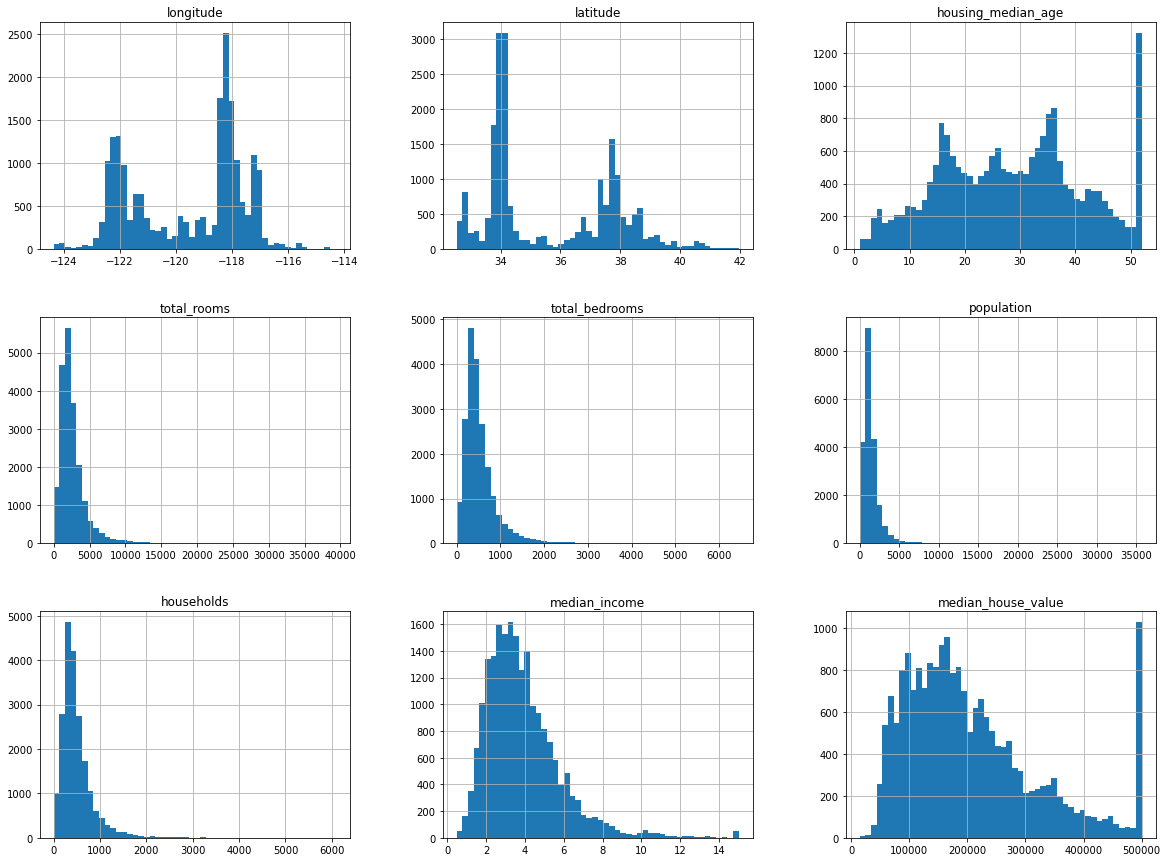

In [15]:
housing.hist(bins=50,figsize=(20,15))
plt.show()

In [8]:
housing.median()

C:\Users\Donald\AppData\Local\Temp/ipykernel_38944/2435994035.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  housing.median()


longitude               -118.4900
latitude                  34.2600
housing_median_age        29.0000
total_rooms             2127.0000
total_bedrooms           435.0000
population              1166.0000
households               409.0000
median_income              3.5348
median_house_value    179700.0000
dtype: float64

<AxesSubplot:>

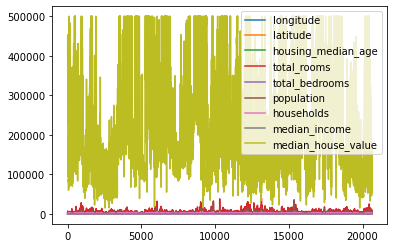

In [10]:
housing.plot()

In [11]:
#now the technical parts come in, to plot the instances into test and training sets
import numpy as np

def split_test_and_train(data,test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [12]:
a = split_test_and_train(housing,test_ratio=0.2)
print(a)

(       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
17185    -122.43     37.43                17.0      11999.0          2249.0   
17543    -121.88     37.35                52.0       1704.0           418.0   
17751    -121.84     37.33                26.0       1934.0           408.0   
2935     -118.98     35.36                15.0       1482.0           338.0   
16466    -121.29     38.10                14.0       1551.0           297.0   
...          ...       ...                 ...          ...             ...   
1700     -122.27     37.97                10.0      15259.0          2275.0   
4928     -118.24     33.99                44.0        448.0           116.0   
14034    -117.14     32.74                47.0       1494.0           327.0   
1486     -122.02     37.96                25.0       2615.0           368.0   
18358    -122.10     37.36                35.0       2063.0           266.0   

       population  households  median_income  medi

In [12]:
train_set,test_set = split_test_and_train(housing,0.2)
len(train_set)

16512

In [13]:
len(test_set)

4128

In [14]:
from zlib import crc32

def test_check_set(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xfffffffff < test_ratio * 2*32

In [15]:
def split_test_train_by_id(data,id_column,test_ratio):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_ : test_check_set(id_,test_ratio))
    return data.loc[~in_test_set],data.loc[in_test_set]

In [16]:
housing_with_id = housing.reset_index()
train_set,test_set = split_test_train_by_id(housing_with_id,"index",0.2)

In [17]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set,test_set = split_test_train_by_id(housing_with_id,"id",0.2)

In [18]:
from sklearn.model_selection import train_test_split

train_set,test_set = train_test_split(housing,test_size=0.2,random_state=42)

<AxesSubplot:>

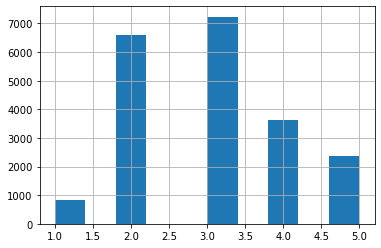

In [19]:
housing["income_category"] = pd.cut(housing["median_income"],bins=[0.,1.5,3.0,4.5,6.0,np.inf],labels=[1,2,3,4,5])
housing["income_category"].hist()

In [26]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index, test_index  in split.split(housing,housing["income_category"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]


In [27]:
strat_test_set["income_category"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_category, dtype: float64

In [28]:
for set_ in (strat_train_set,strat_test_set):
    set_.drop("income_category", axis=1, inplace=True)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

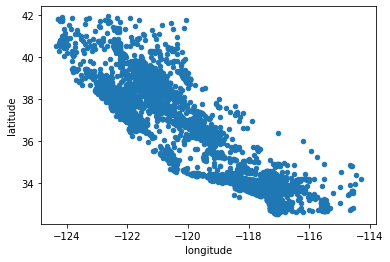

In [29]:
housingCopy = strat_train_set.copy()
housingCopy.plot(kind="scatter",x="longitude",y="latitude")

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

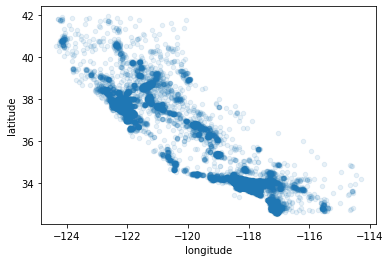

In [30]:
housingCopy.plot(kind="scatter",x="longitude",y="latitude",alpha=0.1)

<AxesSubplot:>

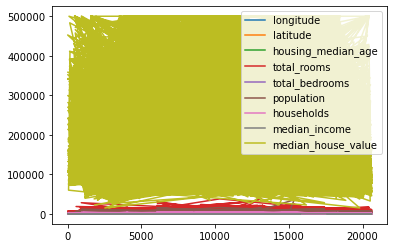

In [31]:
housingCopy.plot()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

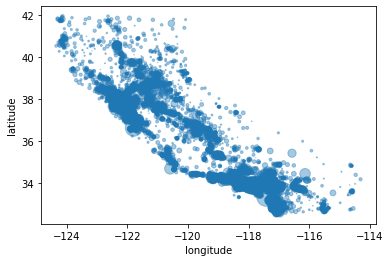

In [32]:
housing.plot(kind = "scatter",x = "longitude",y = "latitude", alpha = 0.4, s=housing["population"]/100)

In [33]:
housing.plt(kind="scatter",x="latitude",y="longitude",alpha=0.1)
plt.show()

AttributeError: 'DataFrame' object has no attribute 'plt'

In [34]:
housing.plot(kind = "scatter", x="longitude" ,y="latitude",alpha = 0.4,s = housing["population"]/100, label="population", figsize=(10.7),c = "median_house_value", cmap = plt.get_cmap("jet"), colorbar=True)
plt.legend()

TypeError: Value after * must be an iterable, not float

In [35]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [36]:
from pandas.plotting import scatter_matrix

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_income', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='housing_median_age'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot

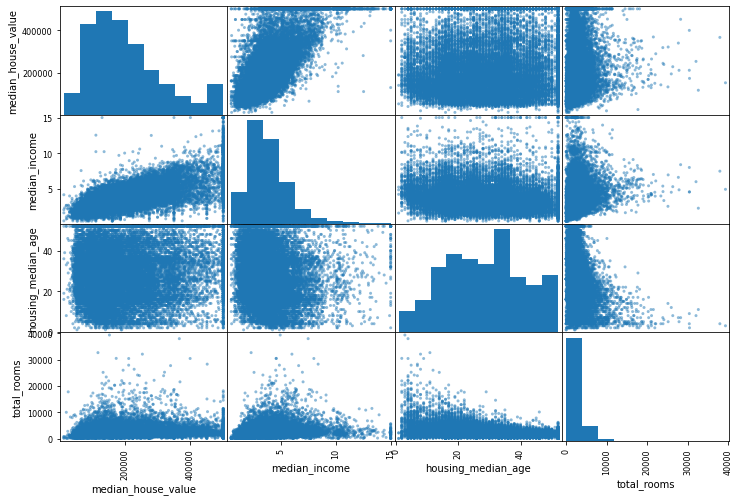

In [37]:
attributes = ["median_house_value","median_income","housing_median_age","total_rooms"]
scatter_matrix(housing[attributes], figsize=(12,8))

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

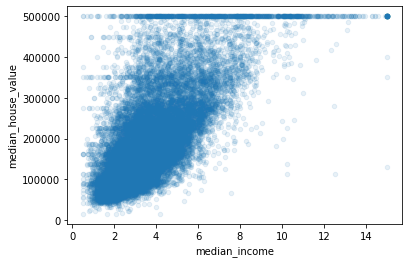

In [45]:
housing.plot(kind="scatter",x="median_income",y="median_house_value",alpha=0.1)

 ## Experimenting With Attribute Combinations:
     Before preparing the machine learning algorithm you must try the ATTRIBUTES COMBINATIONS For example total numbers of rooms is not really useful if you don't know how many households are there.

In [39]:
#creating new attributes

housing["rooms_per_household"]=housing["total_rooms"]/housing["households"]
housing["bedrooms_per_rooms"]=housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_rooms         -0.255880
Name: median_house_value, dtype: float64

# Prepare the data for ML algo
### writing the functions is ought to be more efficient.

In [41]:
housing = strat_train_set.drop("median_house_value", axis = 1)
housing_labels = strat_train_set["median_house_value"].copy() 

# Data Cleaning
    Gonna use DataFrame's 
        dropna(),drop(),and fillna()

In [43]:
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median, inplace=True)